In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
ade = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/ade_sales.csv', encoding='cp949')

In [3]:
print(ade.shape)

(32, 7)


In [4]:
# 중복된 열을 찾아 제거
ade.drop_duplicates(inplace=True, ignore_index=True)

In [5]:
#  Date의 데이터 타입을 날짜타입으로 변환
ade['Date'] = pd.to_datetime(ade['Date'])

In [6]:
# ade에서 빈칸의 위치를 찾는 코드를 작성
# print("열 확인 \n", ade.isnull().any())
print("행 확인 \n",   ade[ade.isnull().any(axis=1)].index  ) 

행 확인 
 Int64Index([7, 19], dtype='int64')


In [7]:
# 빈칸으로 부터 과거 4일사이의 값들의 평균을 계산하고 반올림하여 메우는(Imputing) 코드
import numpy as np
ade.loc[19, 'Leaflets'] = np.around( ade.loc[15:18, 'Leaflets'].mean() )

In [8]:
# 요일 컬럼 추가
import datetime

ade.loc[7, 'Date'] = datetime.datetime.strptime('2016-07-08 00:00:00', '%Y-%m-%d %H:%M:%S')
ade.loc[19, 'Date'] = datetime.datetime.strptime('2016-07-20 00:00:00', '%Y-%m-%d %H:%M:%S')
ade['Date'] = pd.to_datetime(ade['Date'])

ade['day'] = ade['Date'].dt.weekday # 월요일이 0이다.

In [9]:
# wdwe 컬럼을 추가, 평일 1, 주말 0
ade['wdwe'] = 1
ade.loc[ ade['day'].isin([5,6]) , 'wdwe'] = 0

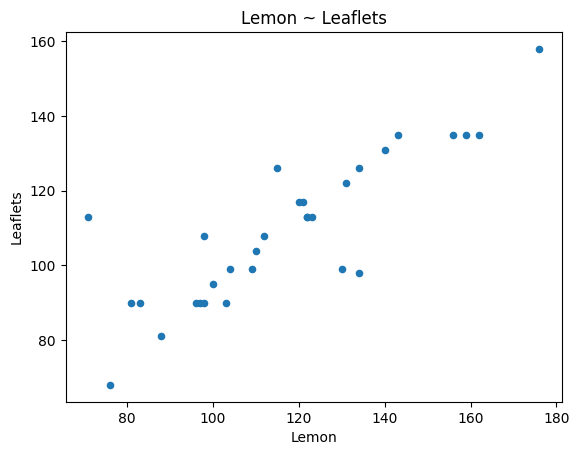

In [10]:
# 산점도 : x='Lemon', y='Leaflets'
ade.plot(kind='scatter', x='Lemon', y='Leaflets')
plt.title('Lemon ~ Leaflets')
plt.show()

In [11]:
#  effect_leaflets 컬럼을 추가
ade['effect_leaflets'] = (ade['Lemon'] + ade['Orange']) / ade['Leaflets']

In [12]:
# 트레이닝셋 / 테스트셋으로 분할
x = ade[['Temperature', 'Leaflets', 'Price','effect_leaflets','wdwe']]
y = ade[['Lemon']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2021, stratify = ade['Location'])

In [13]:
# 트레이닝셋 / 벨리데이션셋으로 분할
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=2021)

In [14]:
# 다중회귀 선형분석 모델
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(x_train, y_train['Lemon'])

LinearRegression()

In [15]:
# mean absolute error 성능 지표
y_pred=line_fitter.predict(x_test)
from sklearn.metrics import mean_absolute_error as MAE
mae = MAE(y_test, y_pred)
print(mae)

3.102522357754893


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


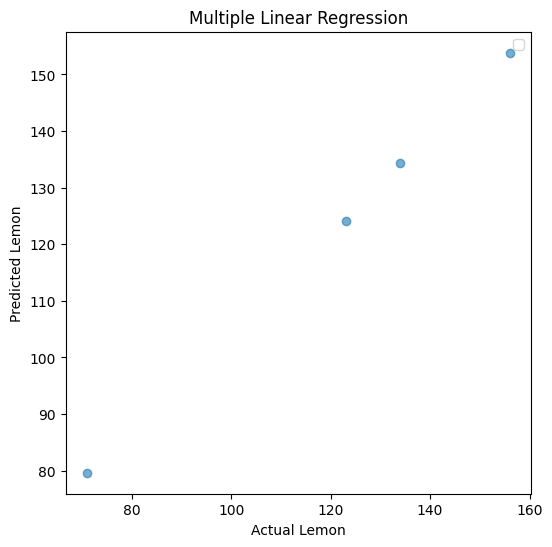

In [16]:
# 예측데이터와 실제 데이터를 산점도를 통해서, 정확성에 대해 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_test['Lemon'], y_pred, alpha=0.6)
plt.xlabel('Actual Lemon')
plt.ylabel('Predicted Lemon')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
# 딥러닝 모델
keras.backend.clear_session()

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(5,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam',
              loss='mse') 

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=2000, batch_size=32,
                    verbose=0,validation_data=(x_valid, y_valid),callbacks=[es])

Restoring model weights from the end of the best epoch: 1006.
Epoch 1106: early stopping


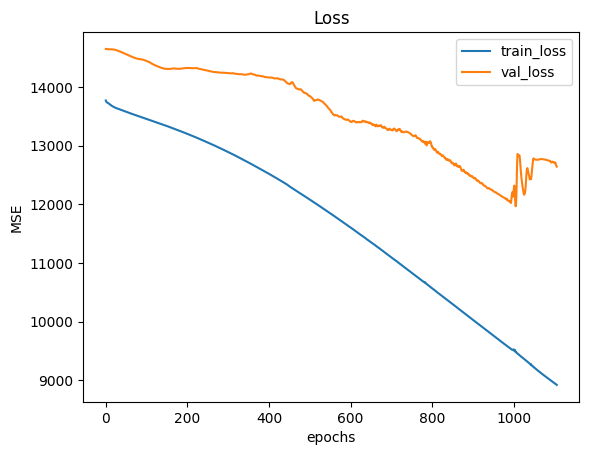

In [19]:
# 여기에 답안코드를 작성하세요
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [20]:
# 예측 결과의 loss 값을 출력
from sklearn.metrics import mean_squared_error as MSE
y_pred=model.predict(x_test)
mse = MSE(y_test, y_pred)
print(mse)

1/1 [==============================] - 0s 193ms/step
10677.472036390383
